In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv("/content/sample_data/dseats_2024_training_dataset.csv")
# Display the DataFrame
df

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,07/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
1,08/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
2,09/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
3,10/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
4,11/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4500.454030,370.025890,4020.534770,0.000000,479.919260,33.071950,0.0000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6920,26/06/2015 00:00,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2903.229117,379.373252,2460.629972,182.554483,442.599145,1.880480,747.8181,614123.984,64.2838
6921,27/06/2015 00:00,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2905.030564,379.379814,2456.159205,184.106427,448.871358,2.120109,749.2019,614168.462,64.4725
6922,28/06/2015 00:00,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2928.389988,379.313739,2484.425946,175.609150,443.964042,1.980460,789.9611,648175.070,65.9192
6923,29/06/2015 00:00,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2939.874982,379.288114,2496.000496,173.255362,443.874486,1.692930,789.7724,637067.219,63.3403


In [3]:
df.describe()

,N_WELL_BORE_CODE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
count,6925.000000,6925.000000,6925.000000,6925.000000,6925.000000,6925.000000,6919.000000,6925.000000,6.925000e+03,6925.000000
mean,107.297040,2587.482923,349.674794,2161.986343,180.369383,716.576882,21.864557,8494.774524,6.978690e+06,11480.559310
std,0.980161,1588.474034,46.240823,1053.875029,139.771514,347.859953,22.300691,8927.596731,7.100875e+06,11484.481008
min,105.000000,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-2879.813600
25%,107.000000,0.000000,273.150000,896.612291,0.000000,476.539814,4.631982,1686.600600,1.434288e+06,80.323300
50%,107.000000,3378.397358,376.911370,2472.031527,213.091127,619.647824,14.301660,5479.470600,4.770461e+06,5529.413200
75%,108.000000,3664.905359,379.496193,2907.047474,300.356843,903.890487,31.529768,11730.472600,9.892230e+06,22261.505100
max,109.000000,4606.666675,381.652178,4592.612695,435.287508,1991.009935,125.718570,37122.573600,3.004494e+07,50444.164600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6925 entries, 0 to 6924
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PRODUCTION DATE                6925 non-null   object 
 1   Field Name                     6925 non-null   object 
 2   WELL_BORE_CODE                 6925 non-null   object 
 3   N_WELL_BORE_CODE               6925 non-null   int64  
 4   WellBore Name                  6925 non-null   object 
 5   FLOW_KIND                      6925 non-null   object 
 6   WELL_TYPE                      6925 non-null   object 
 7   Downhole Pressure (PSI)        6925 non-null   float64
 8   Downhole Temperature (Kelvin)  6925 non-null   float64
 9   Average Tubing Pressure        6925 non-null   float64
 10  Annulus Pressure (PSI)         6925 non-null   float64
 11  AVG WHP (PSI)                  6925 non-null   float64
 12  Choke Size                     6919 non-null   f

In [4]:
#check missing values
df.isnull().sum()

,0
PRODUCTION DATE,0
Field Name,0
WELL_BORE_CODE,0
N_WELL_BORE_CODE,0
WellBore Name,0
FLOW_KIND,0
WELL_TYPE,0
Downhole Pressure (PSI),0
Downhole Temperature (Kelvin),0
Average Tubing Pressure,0


In [4]:
 # Convert the column to datetime format using the correct format
df['PRODUCTION DATE'] = pd.to_datetime(df['PRODUCTION DATE'], format='%d/%m/%Y %H:%M', errors='coerce')

# Display the updated DataFrame
df

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2014-04-07,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
1,2014-04-08,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
2,2014-04-09,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
3,2014-04-10,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.0000
4,2014-04-11,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4500.454030,370.025890,4020.534770,0.000000,479.919260,33.071950,0.0000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6920,2015-06-26,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2903.229117,379.373252,2460.629972,182.554483,442.599145,1.880480,747.8181,614123.984,64.2838
6921,2015-06-27,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2905.030564,379.379814,2456.159205,184.106427,448.871358,2.120109,749.2019,614168.462,64.4725
6922,2015-06-28,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2928.389988,379.313739,2484.425946,175.609150,443.964042,1.980460,789.9611,648175.070,65.9192
6923,2015-06-29,DSEAT,DSEAT-001-F-15 D,109,001-F-15 D,production,OP,2939.874982,379.288114,2496.000496,173.255362,443.874486,1.692930,789.7724,637067.219,63.3403


In [5]:
#checking number of wells
i = ['WELL_BORE_CODE','N_WELL_BORE_CODE', 'WellBore Name']
for j in i:
    u = df[j].unique()
    print(u)

['DSEAT-001-F-1 C' 'DSEAT-001-F-11 H' 'DSEAT-001-F-12 H'
 'DSEAT-001-F-14 H' 'DSEAT-001-F-15 D']
[105 106 107 108 109]
['001-F-1 C' '001-F-11' '001-F-12' '001-F-14' '001-F-15 D']


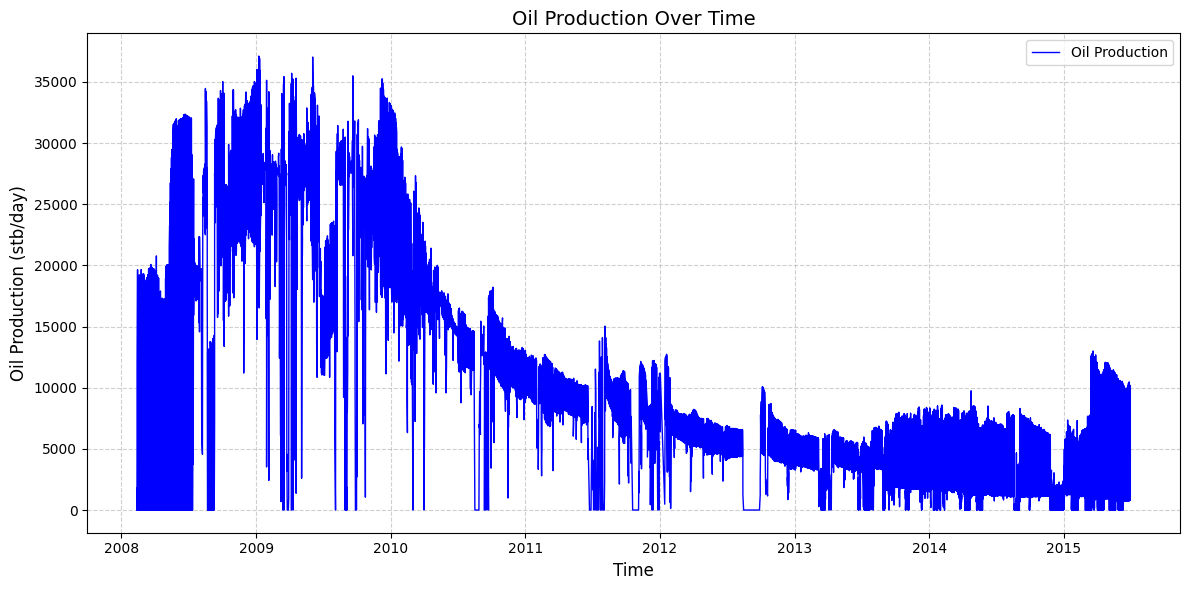

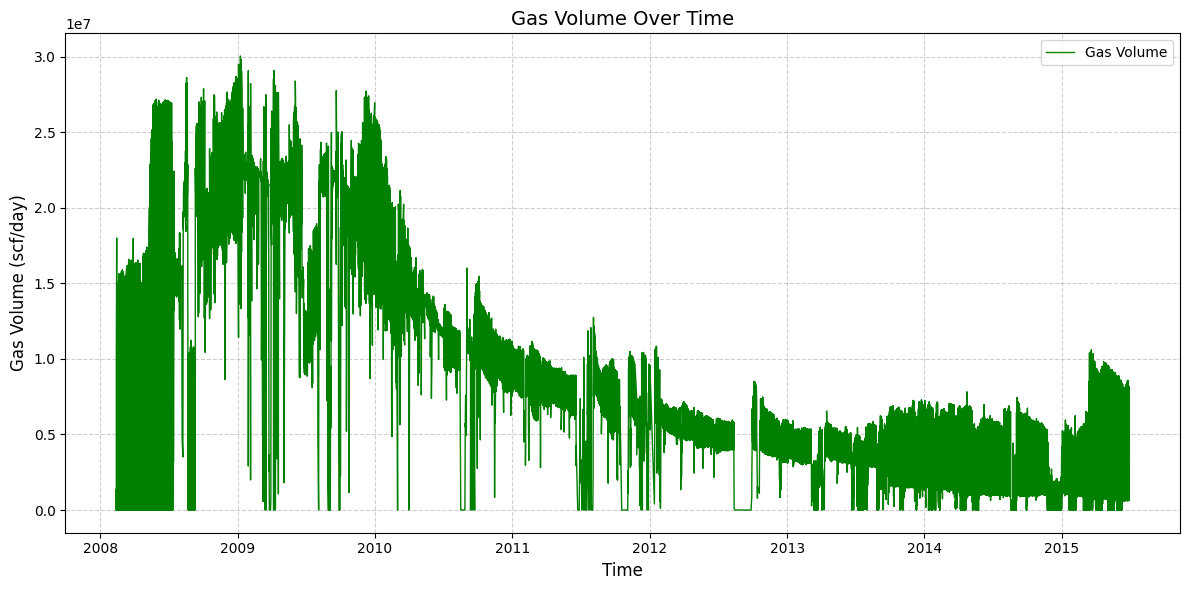

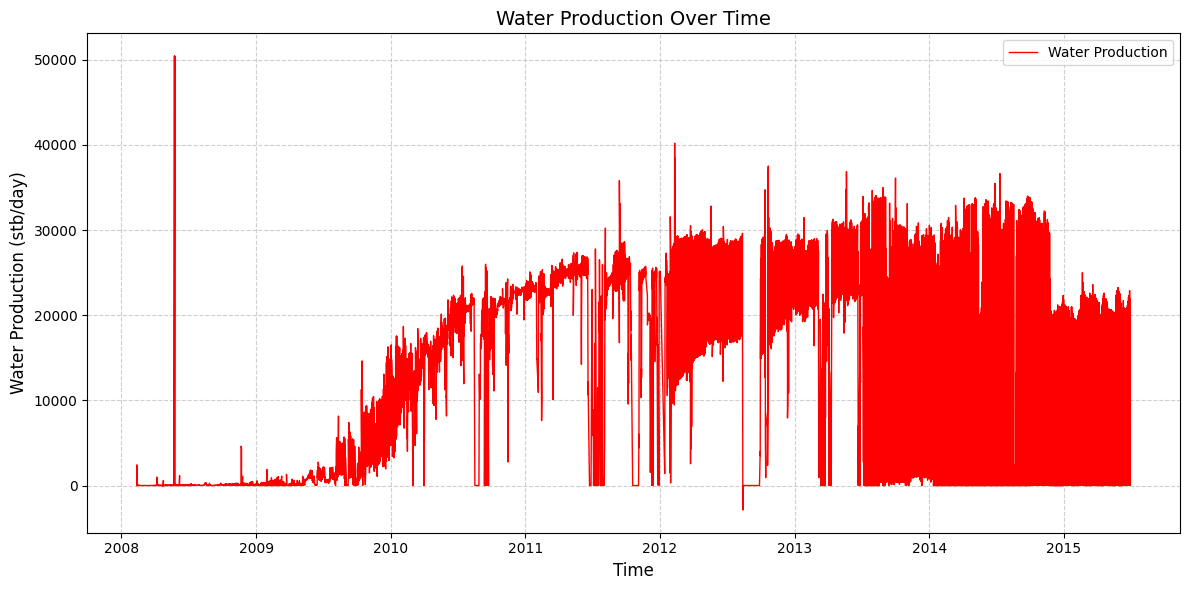

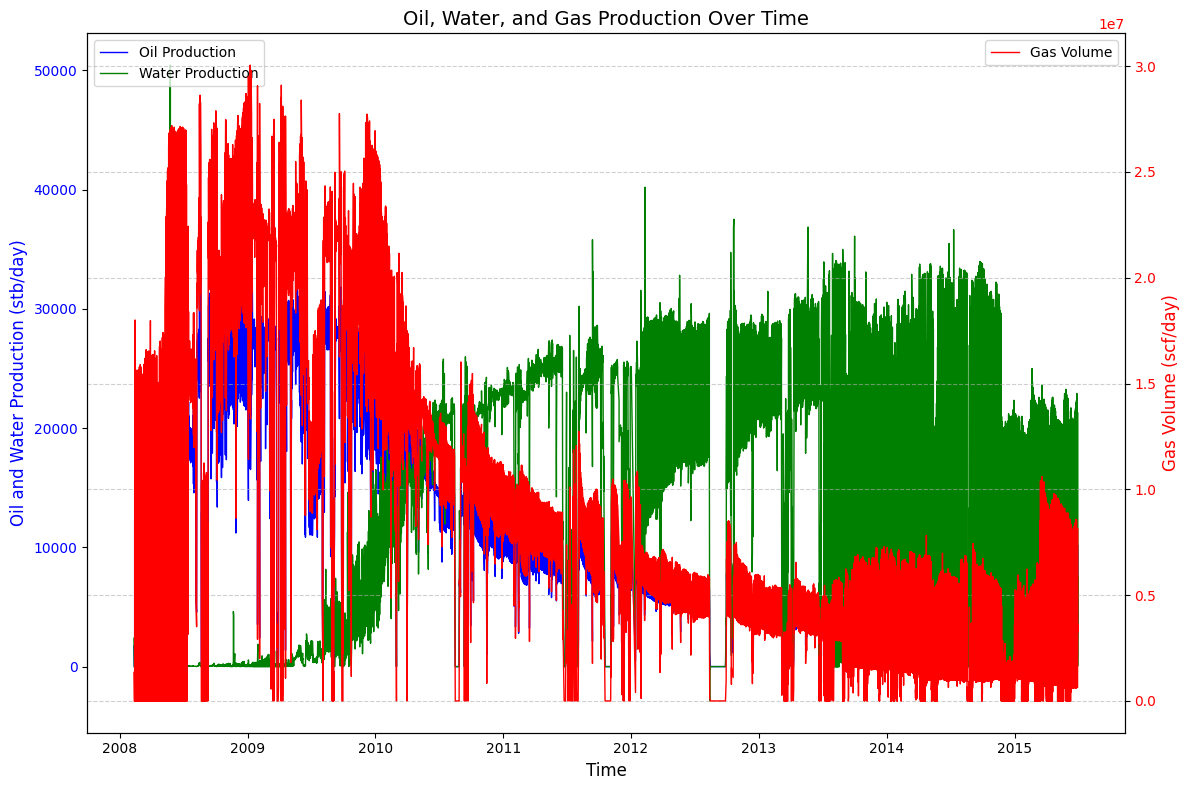

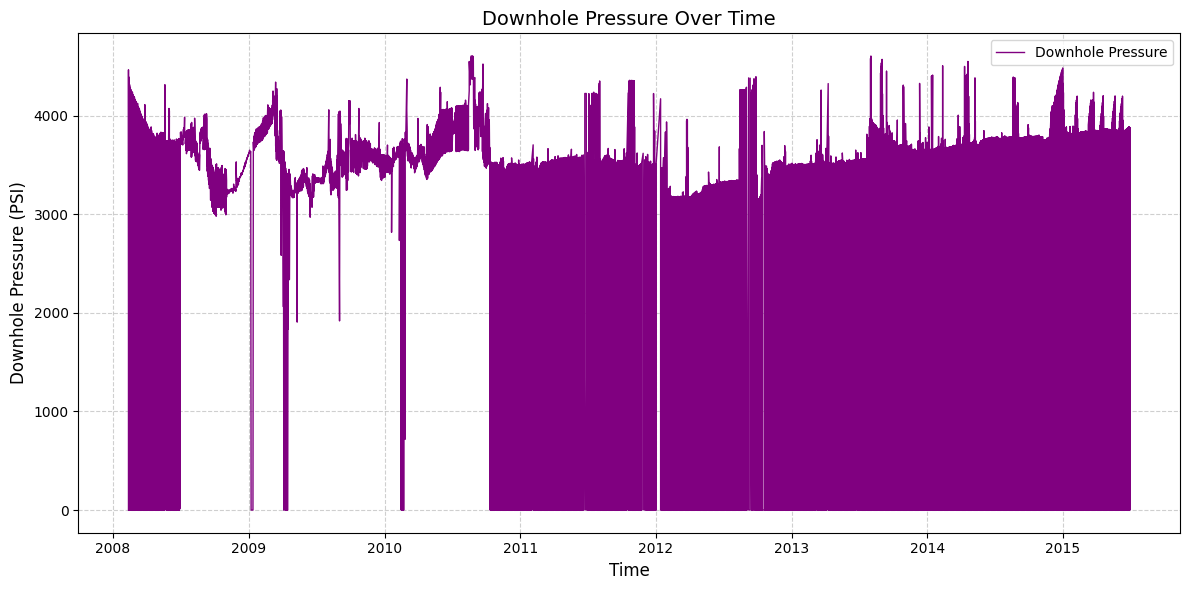

In [ ]:
df['PRODUCTION DATE'] = pd.to_datetime(df['PRODUCTION DATE'],  format='%d/%m/%Y %H:%M', dayfirst=True)
df.columns = df.columns.str.strip()
 #Set the time column as the index for better plotting
df.set_index('PRODUCTION DATE', inplace=True)
import matplotlib.pyplot as plt
df = df.sort_index()


# Plot Oil Production
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Oil Production (stb/day)'], label='Oil Production', color='blue', linewidth=1)
plt.title('Oil Production Over Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Oil Production (stb/day)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot Gas Volume
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Gas Volume (scf/day)'], label='Gas Volume', color='green', linewidth=1)
plt.title('Gas Volume Over Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Gas Volume (scf/day)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot Water Production
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Water Production (stb/day)'], label='Water Production', color='red', linewidth=1)
plt.title('Water Production Over Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Water Production (stb/day)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Combined Plot for Oil, Water, and Gas Production
fig, ax1 = plt.subplots(figsize=(12, 8))

# Oil and Water Production
ax1.plot(df.index, df['Oil Production (stb/day)'], label='Oil Production', color='blue', linewidth=1)
ax1.plot(df.index, df['Water Production (stb/day)'], label='Water Production', color='green', linewidth=1)
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Oil and Water Production (stb/day)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left', fontsize=10)

# Gas Volume on Secondary Axis
ax2 = ax1.twinx()
ax2.plot(df.index, df['Gas Volume (scf/day)'], label='Gas Volume', color='red', linewidth=1)
ax2.set_ylabel('Gas Volume (scf/day)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right', fontsize=10)

plt.title('Oil, Water, and Gas Production Over Time', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
fig.tight_layout()
plt.show()

# Plot Downhole Pressure Over Time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Downhole Pressure (PSI)'], label='Downhole Pressure', color='purple', linewidth=1)
plt.title('Downhole Pressure Over Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Downhole Pressure (PSI)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [7]:
# Prepare the data for modeling
X = df.drop(columns = ['WELL_BORE_CODE', 'WellBore Name', 'Field Name','Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)','FLOW_KIND','WELL_TYPE','Annulus Pressure (PSI)'])
Y = df[['Oil Production (stb/day)','Water Production (stb/day)', 'Gas Volume (scf/day)']]

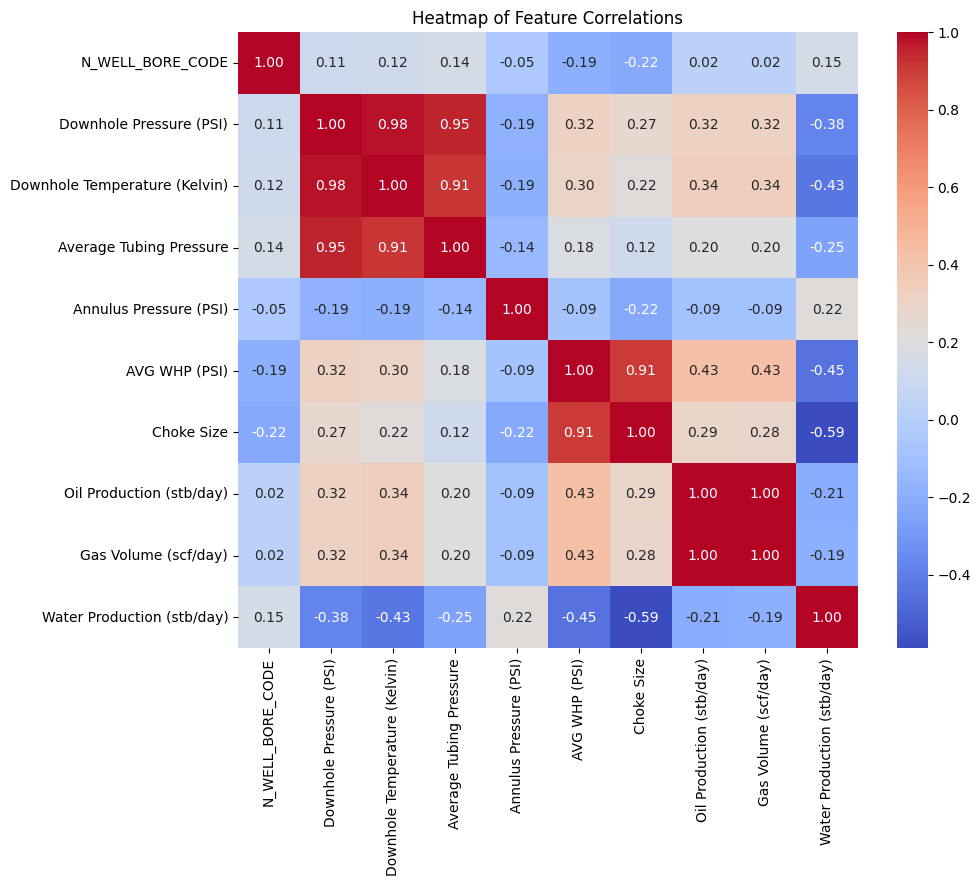

In [8]:
# Compute the correlation matrix
drop = df.drop(columns=['WELL_BORE_CODE', 'WellBore Name', 'Field Name','FLOW_KIND','WELL_TYPE'])
correlation_matrix = drop.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Title and display
plt.title("Heatmap of Feature Correlations")
plt.show()


In [9]:
# Ensure X is a DataFrame
if isinstance(X, np.ndarray):
    X = pd.DataFrame(X)

# Convert datetime columns to timestamps
datetime_cols = X.select_dtypes(include=[np.datetime64]).columns
for col in datetime_cols:
    X[col] = X[col].astype(np.int64)  # Convert datetime to int (timestamps)


In [10]:
# Impute missing values with the median
Imputer = SimpleImputer(strategy='most_frequent')
X = Imputer.fit_transform(X)
# Scale the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)

In [11]:
X

array([[ 0.71724067, -1.62902868, -1.655038  , -2.05161182, -2.06010672,
        -0.97704192],
       [-0.30307397,  1.18318831,  0.60326153,  0.71753599,  2.39225388,
         3.16742681],
       [ 0.71724067, -1.62902868, -1.655038  , -2.05161182, -2.06010672,
        -0.97664593],
       ...,
       [-1.3233886 ,  0.43499462,  0.63587084,  0.39087204, -0.03465172,
        -0.08350695],
       [ 0.71724067,  0.81295707,  0.49806068,  1.20645033, -0.77958959,
        -0.88559453],
       [ 1.73755531,  0.20649157,  0.64214815,  0.29195265, -0.77840648,
        -0.88637659]])

In [12]:
Y

array([[-0.95158733, -0.99973071, -0.98286389],
       [-0.75102072, -0.78884719, -0.78952586],
       [-0.95158733, -0.99973071, -0.98286389],
       ...,
       [ 0.18910927, -0.59181589,  0.16469121],
       [-0.80278121,  0.85588104, -0.83316254],
       [-0.8616371 , -0.99434099, -0.89237428]])

In [13]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [14]:
 # Create a decision tree classifier
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [15]:
# Predict using the trained decision tree model
decision_tree_y_pred = decision_tree_model.predict(X_test)

# Define output column names for clarity
output_names = ['Oil Production', 'Water Production', 'Gas Volume']

# Loop through each target column
for i, output in enumerate(output_names):
    mae = mean_absolute_error(y_test[:, i], decision_tree_y_pred[:, i])
    mse = mean_squared_error(y_test[:, i], decision_tree_y_pred[:, i])
    r2 = r2_score(y_test[:, i], decision_tree_y_pred[:, i])

    print(f"Metrics for {output}:")
    print(f"  MAE: {mae}")
    print(f"  MSE: {mse}")
    print(f"  R²: {r2}")
    print()



Metrics for Oil Production:
  MAE: 0.11521219572539718
  MSE: 0.10636096079962812
  R²: 0.8956579705284614

Metrics for Water Production:
  MAE: 0.11264373556829882
  MSE: 0.09256270318567071
  R²: 0.9089740192221494

Metrics for Gas Volume:
  MAE: 0.12280591011829778
  MSE: 0.11102906406252765
  R²: 0.8910836937688404



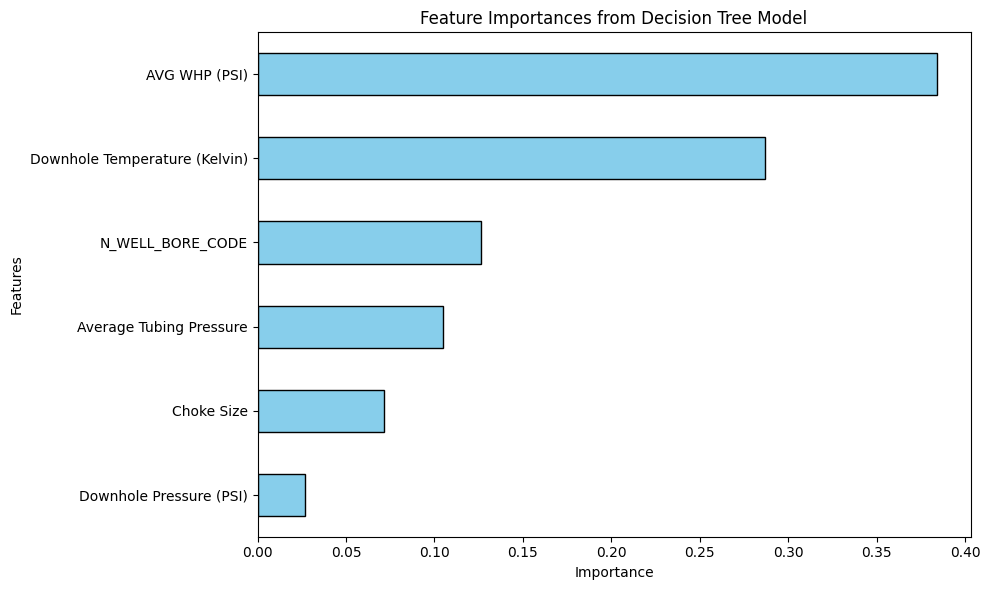

In [16]:
# Retrieve feature names if X_train is now a NumPy array
feature_names = df.drop(columns=['WELL_BORE_CODE', 'WellBore Name', 'Field Name',
                                 'Oil Production (stb/day)', 'Gas Volume (scf/day)',
                                 'Water Production (stb/day)', 'FLOW_KIND',
                                 'WELL_TYPE', 'Annulus Pressure (PSI)']).columns

# Create a Pandas Series for feature importance
model_ranks = pd.Series(decision_tree_model.feature_importances_,
                        index=feature_names,
                        name="Importance").sort_values(ascending=True)

# Plotting
ax = model_ranks.plot(kind="barh", figsize=(10, 6), color="skyblue", edgecolor="black")
ax.set_title("Feature Importances from Decision Tree Model")
ax.set_xlabel("Importance")
ax.set_ylabel("Features")
plt.tight_layout()
plt.show()


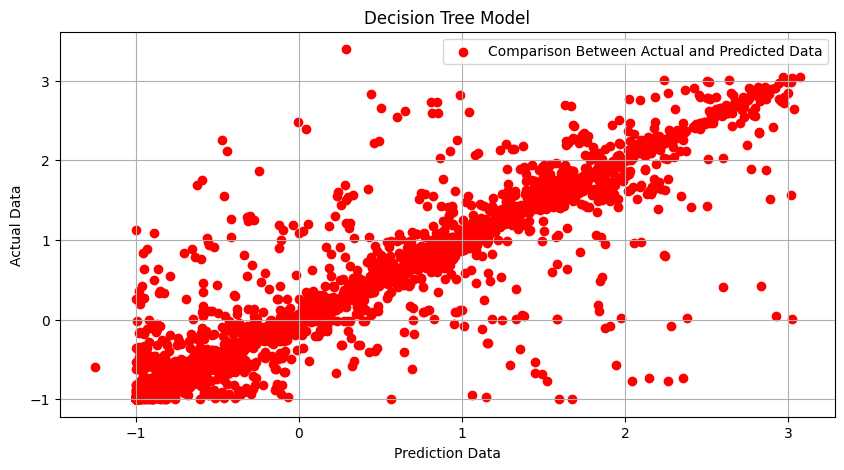

In [17]:
plt.figure(figsize = (10,5))
plt.scatter(y_test, decision_tree_y_pred, color = "red", label = "Comparison Between Actual and Predicted Data")
plt.legend()
plt.grid()
plt.title("Decision Tree Model")
plt.xlabel("Prediction Data")
plt.ylabel("Actual Data")
plt.show()

In [18]:
# Train the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict on the test set
random_forest_y_pred = random_forest_model.predict(X_test)

# Define column names for clarity
output_names = ['Oil Production (stb/day)', 'Water Production (stb/day)', 'Gas Volume (scf/day)']


# Evaluate metrics for each target column
for i, output in enumerate(output_names):
    y_true = y_test[:, i]
    y_pred = random_forest_y_pred[:, i]

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Metrics for {output}:")
    print(f"  MAE: {mae:.2f}")
    print(f"  MSE: {mse:.2f}")
    print(f"  R²: {r2:.2f}")
    print()

Metrics for Oil Production (stb/day):
  MAE: 0.10
  MSE: 0.05
  R²: 0.95

Metrics for Water Production (stb/day):
  MAE: 0.10
  MSE: 0.05
  R²: 0.95

Metrics for Gas Volume (scf/day):
  MAE: 0.10
  MSE: 0.06
  R²: 0.94



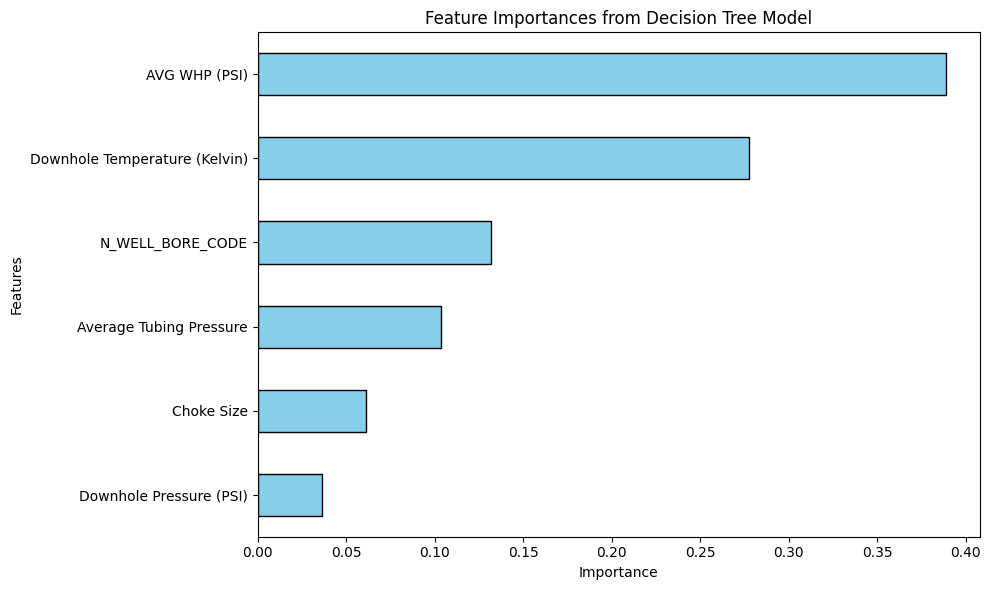

In [19]:
# Retrieve feature names if X_train is now a NumPy array
feature_names = df.drop(columns=['WELL_BORE_CODE', 'WellBore Name', 'Field Name',
                                 'Oil Production (stb/day)', 'Gas Volume (scf/day)',
                                 'Water Production (stb/day)', 'FLOW_KIND',
                                 'WELL_TYPE', 'Annulus Pressure (PSI)']).columns

# Create a Pandas Series for feature importance
model_ranks = pd.Series(random_forest_model.feature_importances_,
                        index=feature_names,
                        name="Importance").sort_values(ascending=True)

# Plotting
ax = model_ranks.plot(kind="barh", figsize=(10, 6), color="skyblue", edgecolor="black")
ax.set_title("Feature Importances from Decision Tree Model")
ax.set_xlabel("Importance")
ax.set_ylabel("Features")
plt.tight_layout()
plt.show()


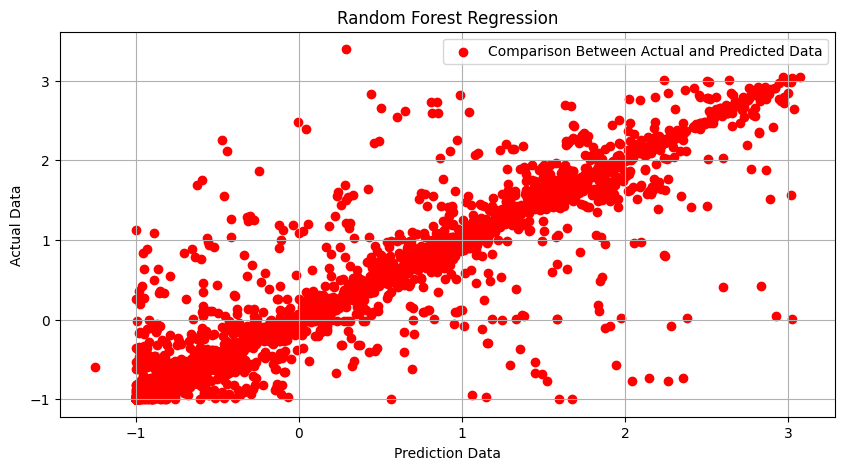

In [20]:
plt.figure(figsize = (10,5))
plt.scatter(y_test, decision_tree_y_pred, color = "red", label = "Comparison Between Actual and Predicted Data")
plt.legend()
plt.grid()
plt.title("Random Forest Regression")
plt.xlabel("Prediction Data")
plt.ylabel("Actual Data")
plt.show()